# Technical Assessment
### Use case: "JPY=X" forecasting by historical financial data
This assessment will evaluate your ability to source and work with Python coding and machine learning. It will also give a basic task in python that will test your ability to research and apply skills in a new area. As the tasks are sequential, please attempt each task before moving on the next. Where indicated, update the cells below the tasks and ensure that any code obtained runs within the notebook.

#### Prerequisite : Install "pandas-datareader" from https://github.com/pydata/pandas-datareader
#### <font color='lightseagreen'>Prerequisite : If you are running this in an Anaconda Environment, please install the following packages, </font>
#### <font color='lightseagreen'>1)Talib (Technical Analysis Indicator for Python),  >conda install -c conda-forge ta-lib</font>
#### <font color='lightseagreen'>2)pmdarima (Used for task 4 using auto ARIMA)  >pip install pmdarima</font>
#### <font color='lightseagreen'>3)Pathlib (Download csv to Downloads folder)  > conda install -c anaconda pathlib</font> 

#### <font color='lightseagreen'>Recommend to view and run in Jupyter not colabs env</font> 

### Download market data 
Cover 10-years Daily data January 1, 2011 to Sep 30, 2021

<font color='lightseagreen'>Note: I took the liberty to remove CIU and CLY from the tickers index as they do not have data available after a certain point. In addition,i have added more indices like VOO, QQQ and of interest - ^N225 <font>

In [1]:
import pandas_datareader as pdr
from pandas_datareader import data
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import requests
from pathlib import Path

tickers = ['HYG', 'JNK', 'LQD', 'VCIT', 'SPY', 'TMUS', 'CCO', 'THC', 'USD', 'CME', 'EMB', 'AGZ',  'IEI', '^N225', 'VTI', 'VOO', 'QQQ']
#df = pdr.DataReader(tickers, data_source='yahoo', start='2011-01-01', end='2021-09-30')

In [2]:
lst = [] 
for ticker in tickers:
    temp_df = pdr.DataReader(ticker, data_source='yahoo', start='2011-01-01', end='2021-09-30')
    temp_df['Ticker'] = ticker 
    lst.append(temp_df)

empty_df = pd.DataFrame()
df_ticker = empty_df.append(lst)
df_ticker.fillna(0,inplace = True)
df_ticker.head()
    

,High,Low,Open,Close,Volume,Adj Close,Ticker
Date,,,,,,,
2010-12-31,90.309998,90.050003,90.129997,90.290001,715700.0,49.686810,HYG
2011-01-03,90.709999,90.269997,90.290001,90.360001,1448800.0,49.725349,HYG
2011-01-04,90.779999,90.480003,90.559998,90.769997,1077800.0,49.950970,HYG
2011-01-05,91.010002,90.629997,90.639999,91.000000,2537800.0,50.077522,HYG
2011-01-06,91.120003,90.690002,91.040001,91.110001,2046600.0,50.138050,HYG


<h5>Code Snippet 1<h5> 
<font color='lightseagreen'>In the above, i call pandas data reader API to download ticker information in the ticker list for 10 years daily data in a long table format. This makes it suitable for our data analysis later on. I have also replaced missing value with 0 in case of missing values. </font>

In [3]:
##Gathering Some Information on the Indices## 

from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
for index in tickers:
    try:
        print(symbols.loc[index])
    except KeyError:
        print(index,"cannot be found")
        


Nasdaq Traded                                                True
Security Name       iShares iBoxx $ High Yield Corporate Bond ETF
Listing Exchange                                                P
Market Category                                                  
ETF                                                          True
Round Lot Size                                                100
Test Issue                                                  False
Financial Status                                              NaN
CQS Symbol                                                    HYG
NASDAQ Symbol                                                 HYG
NextShares                                                  False
Name: HYG, dtype: object
Nasdaq Traded                                              True
Security Name       SPDR Bloomberg Barclays High Yield Bond ETF
Listing Exchange                                              P
Market Category                                          

<h5>Code Snippet 2<h5> 
<font color='lightseagreen'>Making use of the NASDAQ trader API on pdr to download some simple information on indices, interestingly, some have different underlying assets, eeg. Bond vs Stock index. </font>

In [4]:
index_closing = df_ticker[['Close', 'Ticker']]
index_closing.reset_index(level=0, inplace=True)
index_closing = index_closing.pivot(index = 'Date',columns = 'Ticker' ,values='Close')
index_closing = index_closing.fillna(method = 'ffill')
index_closing = index_closing.fillna(0)
index_closing

Ticker,AGZ,CCO,CME,EMB,HYG,IEI,JNK,LQD,QQQ,SPY,THC,TMUS,USD,VCIT,VOO,VTI,^N225
Date,,,,,,,,,,,,,,,,,
2010-12-31,109.519997,14.04,64.349998,107.080002,90.290001,114.650002,119.129997,108.440002,54.459999,125.750000,26.760000,25.260000,1.659167,78.680000,115.139999,64.930000,0.000000
2011-01-03,109.540001,14.67,63.287998,107.529999,90.360001,114.709999,119.610001,108.860001,55.310001,127.050003,27.200001,26.139999,1.671250,78.629997,116.220001,65.599998,0.000000
2011-01-04,109.489998,14.80,63.397999,108.190002,90.769997,114.779999,119.970001,109.000000,55.270000,126.980003,27.360001,27.840000,1.682500,78.879997,116.120003,65.470001,10398.099609
2011-01-05,109.129997,14.75,62.271999,107.570000,91.000000,114.139999,120.540001,108.199997,55.740002,127.639999,27.440001,28.520000,1.689583,78.250000,116.739998,65.830002,10380.769531
2011-01-06,109.199997,14.65,62.728001,106.739998,91.110001,114.389999,120.599998,108.360001,55.919998,127.389999,27.480000,26.600000,1.720417,78.500000,116.540001,65.680000,10529.759766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,118.500000,2.76,198.009995,110.940002,87.910004,130.279999,109.839996,134.919998,373.329987,443.910004,71.389999,129.429993,38.240002,95.050003,409.459991,229.639999,30248.810547
2021-09-27,118.440002,2.85,198.429993,110.610001,87.830002,130.089996,109.750000,134.850006,370.350006,442.640015,69.589996,127.779999,38.029999,94.900002,408.299988,229.139999,30240.060547
2021-09-28,118.239998,2.73,197.889999,109.980003,87.430000,129.960007,109.269997,133.410004,359.869995,433.720001,67.080002,126.309998,35.160000,94.440002,400.140015,224.339996,30183.960938


<h5>Code Snippet 3<h5> 
<font color='lightseagreen'>Here i select only Close price of all indices and unpivot them in to a wide format, these will be used as our features for the later portions. </font>

### Task 1: Download exchange rate tickers, join both dataframes and generate .csv file. 
(exchange rate tickers = 'EUR=X', 'JPY=X', 'CHF=X', 'GBP=X')

In [5]:
# Task 1
##Option 1 - Using PDR  to download different crosses using yahoo API
# retrieve market data of current ticker symbol

usdeur = pdr.DataReader('USDEUR%3DX', data_source='yahoo', start='2011-01-01', end='2021-09-30')
usdeur['Ticker'] = "USDEUR"

usdjpy = pdr.DataReader('USDJPY%3DX', data_source='yahoo', start='2011-01-01', end='2021-09-30')
usdjpy['Ticker'] = "USDJPY"

usdgbp = pdr.DataReader('USDGBP%3DX', data_source='yahoo', start='2011-01-01', end='2021-09-30')
usdgbp['Ticker'] = "USDGBP"

usdchf = pdr.DataReader('USDCHF%3DX', data_source='yahoo', start='2011-01-01', end='2021-09-30')
usdchf['Ticker'] = "USDCHF"

df_forex = usdeur.append([usdjpy,usdgbp,usdchf])
df_forex.fillna(0, inplace = True)
df_forex.head()

,High,Low,Open,Close,Volume,Adj Close,Ticker
Date,,,,,,,
2010-12-31,0.75245,0.74495,0.75182,0.75181,0.0,0.75181,USDEUR
2011-01-03,0.75455,0.74822,0.74873,0.74862,0.0,0.74862,USDEUR
2011-01-04,0.75085,0.74455,0.74850,0.74868,0.0,0.74868,USDEUR
2011-01-05,0.76167,0.75053,0.75053,0.75069,0.0,0.75069,USDEUR
2011-01-06,0.76724,0.75928,0.75982,0.76006,0.0,0.76006,USDEUR


In [6]:
forex_pairs = df_forex[['Close', 'Ticker']]
forex_pairs.reset_index(level=0, inplace=True)
forex_pairs = forex_pairs.pivot(index = 'Date',columns = 'Ticker' ,values='Close')
forex_pairs= forex_pairs.fillna(method = 'ffill')
forex_pairs= forex_pairs.fillna(0)
forex_pairs = forex_pairs.drop('USDJPY',axis = 1 )
forex_pairs

Ticker,USDCHF,USDEUR,USDGBP
Date,,,
2010-12-31,0.934500,0.751810,0.64779
2011-01-03,0.932000,0.748620,0.64216
2011-01-04,0.934240,0.748680,0.64559
2011-01-05,0.947200,0.750690,0.64111
2011-01-06,0.965810,0.760060,0.64466
...,...,...,...
2021-09-23,0.924500,0.851770,0.72873
2021-09-26,0.924470,0.853020,0.73158
2021-09-27,0.925589,0.854935,0.72984


In [7]:
combined = pd.DataFrame()
combined = combined.append([df_ticker,df_forex])
filepath = downloads_path = str(Path.home() / "Downloads"/"Task1.csv")
combined.to_csv(filepath)

<h5>Code Snippet 4<h5> 
<font color='lightseagreen'>
    In the first cell i iteratively download for eeach forex pair using yahoo financee API. Assuming X represents USD for base currency pair and we obtain the same format as our df_indices although volume seems to be missing.
    In the second cell, i use Close price of each pair and pivot them into a long table format which we will use as our features later.
    Lastly, download the combined Forex and Ticker dataframes into CSV format.
</font>

### Task 2: Find the correlation between target variable "JPY=X" and other features

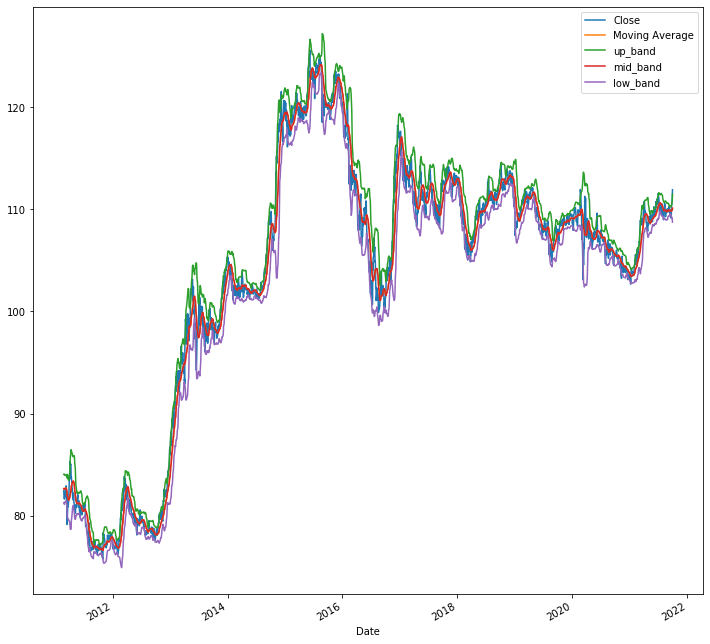

,High,Low,Open,Close,Moving Average,ADX,RSI,up_band,mid_band,low_band,ROC,CCI
Date,,,,,,,,,,,,
2011-02-24,82.449997,81.649002,82.449997,82.438004,82.648301,25.905072,48.006569,84.040442,82.648301,81.256159,0.181072,-51.612418
2011-02-25,82.023003,81.650002,82.019997,82.046997,82.606400,24.792347,43.360417,84.017833,82.606400,81.194967,-0.311051,-73.395534
2011-02-28,81.919998,81.599998,81.620003,81.622002,82.583051,23.780036,38.948125,84.042581,82.583051,81.123520,-0.967006,-89.075782
2011-03-01,82.220001,81.830002,81.874001,81.873001,82.573201,22.653562,42.659265,84.049016,82.573201,81.097385,-1.760254,-63.374408
2011-03-02,82.099998,81.599998,81.898003,81.898003,82.598551,21.675183,43.030738,84.008203,82.598551,81.188899,-1.852737,-79.131730


In [8]:
# Task 2
## Seleeecting subset of DF for JUST USDJPY, Now wee can seee we havee 5 Features, lets build moree!
## Reference: https://jfin-swufe.springeropen.com/articles/10.1186/s40854-020-00220-2#Sec7 
## Installing Technical Analysis Library in python: https://towardsdatascience.com/technical-analysis-of-stocks-using-ta-lib-305614165051
## If you are using Anaconda install ta-lib using conda install -c conda-forge ta-lib
import talib as ta
pd.options.mode.chained_assignment = None

jpy = df_forex.loc[df_forex['Ticker'] == "USDJPY"]
jpy = jpy.drop(columns=['Ticker', 'Volume','Adj Close'])
#jpy.head() 

jpy['Moving Average'] = ta.SMA(jpy['Close'],20) ## Adding Feature #1 - Simple Moving Average 
jpy['ADX'] = ta.ADX(jpy['High'],jpy['Low'], jpy['Close'], timeperiod=20) ##Adding Feature #2 - Average Directional Movement Index (ADX)
#jpy['MACD'] = ta.MACD(jpy['Close'],fastperiod=12, slowperiod=26, signalperiod=9)
jpy['RSI'] = ta.RSI(jpy['Close'],14) ## Adding Feature #4 - Relative Strength Index RSI
jpy['up_band'], jpy['mid_band'], jpy['low_band'] = ta.BBANDS(jpy['Close'], timeperiod =20) ## Adding Features #5-7 Bollinger Bands
jpy['ROC'] = ta.ROC(jpy['Close'],12) ## Adding Feature #8 Rate of Change ROC
jpy['CCI'] = ta.CCI(jpy['High'], jpy['Low'],jpy['Close'],20)
jpy = jpy.dropna()


jpy[['Close','Moving Average','up_band','mid_band','low_band']].plot(figsize=(12,12)) 
plt.show()

jpy.head()

<h5>Code Snippet 5<h5> 
<font color='lightseagreen'>In this cell, i first isolate jpy pair as its own df from df_forex. I proceed to clean the df by dropping ticker, vol, and adj close as they represent no further information and since adj close is == closee, i dont want it to affect our analysis. Then, making use of talib, i add a total of 6 more technical indicators as features and we obtain the plot shown. </font>
    
    For explanation of TA used see https://technical-analysis-library-in-python.readthedocs.io/en/latest/
    These TA were also selected based on their use in LSTM later https://jfin-swufe.springeropen.com/articles/10.1186/s40854-020-00220-2#Sec7

In [9]:
result = pd.concat([jpy,index_closing,forex_pairs], axis=1, join="inner")
result = result.fillna(method = 'ffill')
result = result.dropna()
result

,High,Low,Open,Close,Moving Average,ADX,RSI,up_band,mid_band,low_band,...,THC,TMUS,USD,VCIT,VOO,VTI,^N225,USDCHF,USDEUR,USDGBP
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-24,82.449997,81.649002,82.449997,82.438004,82.648301,25.905072,48.006569,84.040442,82.648301,81.256159,...,27.879999,27.059999,1.883750,79.230003,119.760002,67.489998,10452.709961,0.931900,0.726530,0.61595
2011-02-25,82.023003,81.650002,82.019997,82.046997,82.606400,24.792347,43.360417,84.017833,82.606400,81.194967,...,28.280001,28.219999,1.984583,79.519997,121.059998,68.339996,10526.759766,0.924820,0.723590,0.61941
2011-02-28,81.919998,81.599998,81.620003,81.622002,82.583051,23.780036,38.948125,84.042581,82.583051,81.123520,...,28.719999,28.799999,1.937500,79.300003,121.779999,68.709999,10624.089844,0.928000,0.728100,0.62110
2011-03-01,82.220001,81.830002,81.874001,81.873001,82.573201,22.653562,42.659265,84.049016,82.573201,81.097385,...,28.120001,28.520000,1.877917,79.410004,119.699997,67.550003,10754.030273,0.928820,0.723510,0.61461
2011-03-02,82.099998,81.599998,81.898003,81.898003,82.598551,21.675183,43.030738,84.008203,82.598551,81.188899,...,28.360001,28.400000,1.922500,79.190002,120.040001,67.690002,10492.379883,0.928300,0.726120,0.61490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-22,110.195000,109.792000,109.808998,109.821999,109.846100,7.469219,50.240038,110.387900,109.846100,109.304299,...,73.230003,127.730003,37.310001,95.589996,403.899994,227.320007,29639.400391,0.926300,0.855600,0.73437
2021-09-23,110.738998,110.310997,110.322998,110.325996,109.860000,7.570499,56.243388,110.435050,109.860000,109.284950,...,72.669998,130.940002,38.500000,95.160004,408.779999,230.089996,29639.400391,0.924500,0.851770,0.72873
2021-09-27,111.628998,110.936996,110.961998,110.963997,109.955950,8.759792,62.551174,110.792398,109.955950,109.119501,...,69.589996,127.779999,38.029999,94.900002,408.299988,229.139999,30240.060547,0.925589,0.854935,0.72984


In [10]:
corrMatrix = result.corr(method ='pearson')
corrMatrix.style.background_gradient(cmap='coolwarm')

,High,Low,Open,Close,Moving Average,ADX,RSI,up_band,mid_band,low_band,ROC,CCI,AGZ,CCO,CME,EMB,HYG,IEI,JNK,LQD,QQQ,SPY,THC,TMUS,USD,VCIT,VOO,VTI,^N225,USDCHF,USDEUR,USDGBP
High,1.000000,0.999456,0.999635,0.999635,0.994035,0.001934,0.063274,0.992773,0.994035,0.988362,0.023222,0.041322,0.194342,-0.427476,0.527301,-0.230834,-0.395419,0.242419,-0.478311,0.213297,0.420748,0.542309,0.261897,0.403545,0.309066,0.258208,0.542182,0.540554,0.737243,0.548475,0.730213,0.475370
Low,0.999456,1.000000,0.999572,0.999572,0.993657,-0.005370,0.065995,0.991282,0.993657,0.989126,0.025244,0.045375,0.196575,-0.431328,0.534551,-0.229639,-0.394216,0.244174,-0.478782,0.218449,0.428266,0.549740,0.263392,0.410464,0.316720,0.262575,0.549618,0.548029,0.743478,0.547731,0.730059,0.476935
Open,0.999635,0.999572,1.000000,0.999998,0.994272,-0.001142,0.064371,0.992460,0.994272,0.989160,0.023849,0.039517,0.195471,-0.429313,0.530473,-0.230806,-0.396037,0.243341,-0.479474,0.215430,0.423836,0.545352,0.261699,0.406474,0.312072,0.259965,0.545227,0.543583,0.739843,0.548532,0.730433,0.476202
Close,0.999635,0.999572,0.999998,1.000000,0.994263,-0.001125,0.064487,0.992452,0.994263,0.989150,0.023925,0.039574,0.195479,-0.429315,0.530489,-0.230761,-0.395962,0.243342,-0.479417,0.215495,0.423879,0.545398,0.261737,0.406523,0.312119,0.260019,0.545273,0.543630,0.739870,0.548539,0.730403,0.476229
Moving Average,0.994035,0.993657,0.994272,0.994263,1.000000,-0.014977,-0.031890,0.996618,1.000000,0.996455,-0.075671,-0.048229,0.203376,-0.436597,0.536403,-0.246704,-0.420819,0.250789,-0.501824,0.216014,0.427255,0.547782,0.245431,0.412384,0.313478,0.260544,0.547635,0.545468,0.739469,0.540043,0.734587,0.483393
ADX,0.001934,-0.005370,-0.001142,-0.001125,-0.014977,1.000000,0.182912,0.024066,-0.014977,-0.054844,0.145003,0.046917,-0.018657,0.067011,-0.205117,0.070885,-0.035121,0.001800,0.015139,-0.083724,-0.171322,-0.185509,0.028431,-0.198969,-0.181021,-0.061670,-0.185464,-0.186652,-0.171787,0.030286,-0.059284,-0.159617
RSI,0.063274,0.065995,0.064371,0.064487,-0.031890,0.182912,1.000000,-0.018301,-0.031890,-0.045578,0.828168,0.854413,-0.089071,0.062330,-0.053639,0.174311,0.284560,-0.080212,0.254114,0.002473,-0.024250,-0.011006,0.245218,-0.062477,0.006648,0.006264,-0.010884,-0.004083,0.020464,0.083616,-0.057898,-0.109196
up_band,0.992773,0.991282,0.992460,0.992452,0.996618,0.024066,-0.018301,1.000000,0.996618,0.986172,-0.060058,-0.043302,0.192106,-0.424303,0.512623,-0.247821,-0.421182,0.241209,-0.497276,0.196354,0.400910,0.522116,0.238300,0.388261,0.286843,0.243125,0.521973,0.519676,0.717165,0.547675,0.733509,0.478488
mid_band,0.994035,0.993657,0.994272,0.994263,1.000000,-0.014977,-0.031890,0.996618,1.000000,0.996455,-0.075671,-0.048229,0.203376,-0.436597,0.536403,-0.246704,-0.420819,0.250789,-0.501824,0.216014,0.427255,0.547782,0.245431,0.412384,0.313478,0.260544,0.547635,0.545468,0.739469,0.540043,0.734587,0.483393
low_band,0.988362,0.989126,0.989160,0.989150,0.996455,-0.054844,-0.045578,0.986172,0.996455,1.000000,-0.091125,-0.052935,0.213488,-0.446123,0.556990,-0.243831,-0.417499,0.258840,-0.502963,0.234627,0.451232,0.570220,0.251011,0.434191,0.338550,0.276552,0.570070,0.568051,0.757122,0.528445,0.730543,0.485027


<h5>Code Snippet 6<h5> 
<font color='lightseagreen'>
<p>In the first cell we combine all 3 frames, Indices closing price, Forex Pairs Closing price, and JPY Technical indicators as our final dataset to be used for all our features.</p>
<p>We now have about 32 features in our dataset.</p>
<p>Lastly, we plot the Pearson correlation matrix as shown.</p>
<p><strong>Analysis: We can see under column Close, it bears strongest corereelation with Open, Low, High, MA and BB. This suggests at this stage we should be paying atteention to TA as our indicators. Also notee worthy - Nikkei 225 Index also bears strong correelation as expected. USDEUR closing price also has strong correelation, probably because of underlying USD base.</strong></p>
</font>

### Task 3: Perform one of feature selection/reduction method to financial features
(PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
(Lasso: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
(Hierarchical Feature Selection: https://arxiv.org/pdf/1701.06120.pdf)

Last, print the top rank selected features

In [11]:
# Task 3 
## Start by standardizing dataseet using std scaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features = ['High','Low','Open','Moving Average', 'ADX', 'RSI', 'up_band', 'mid_band', 'low_band', 'ROC', 'CCI','HYG', 'JNK', 'LQD', 'VCIT', 'SPY', 'TMUS', 'CCO', 'THC', 'USD', 'CME',  'EMB', 'AGZ',  'IEI', '^N225', 'VTI', 'VOO', 'QQQ','USDCHF','USDEUR','USDGBP'] 
# Separating out the features
x = result.loc[:, features].values
# Separating out the target
y = result.loc[:,['Close']].values
# Standardizing the features
x = StandardScaler().fit_transform(x) 
 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
## https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
## https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
## https://www.geeksforgeeks.org/principal-component-analysis-with-python/

from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.49219593 0.17248198 0.10617295 0.07163012]


In [13]:
pca_explained = pd.DataFrame(pca.components_,columns=features,index = ['PC-1','PC-2','PC-3','PC-4'])
pca_explained

,High,Low,Open,Moving Average,ADX,RSI,up_band,mid_band,low_band,ROC,...,EMB,AGZ,IEI,^N225,VTI,VOO,QQQ,USDCHF,USDEUR,USDGBP
PC-1,-0.197103,-0.198192,-0.197608,-0.198890,0.029814,0.010387,-0.194776,-0.198890,-0.201708,0.016226,...,0.041894,-0.167584,-0.172593,-0.244610,-0.235607,-0.236830,-0.224453,-0.107726,-0.187380,-0.191248
PC-2,-0.247977,-0.245374,-0.246985,-0.246121,-0.059909,-0.008354,-0.254824,-0.246121,-0.235486,-0.000015,...,0.162827,0.244077,0.226838,0.016970,0.129193,0.127767,0.186446,-0.256710,-0.171580,-0.024925
PC-3,0.115491,0.117110,0.115204,0.070758,0.068701,0.447968,0.072785,0.070758,0.068188,0.389792,...,0.186042,-0.052146,-0.037298,0.072074,0.049159,0.040785,0.021040,-0.059841,-0.099301,-0.181253
PC-4,-0.086190,-0.085414,-0.086176,-0.127018,0.083848,0.347253,-0.115392,-0.127018,-0.138030,0.385706,...,0.004119,0.047938,0.036240,-0.061085,-0.046215,-0.038203,-0.030602,0.298691,0.199507,0.273787


<h5>Code Snippet 7<h5> 
<font color='lightseagreen'>
<p>In  [11] we use Sci Kit Learn standard scaler to scale our features accordingly. We also use split test train which will come into play later on.</p>
<p>In the second cell we use PCA to fit our standardized data into 4 new components. This is helpful for us to train our LSTM model later on.</p>
<p>Lastly, we print the PCA components along with the weights of the original features.</p>
<p><strong>Analysis:What is the use of PCA? Important understanding: PCA Does not explicitly imply which features are more "important" rather,identifies the features with the greatest variance in a dataset, and can then use this quality of the dataset to create a smaller dataset with a minimal loss of descriptive power. By reducing the feature dimension space into its Principal Components. (Hence thee name) The advantages of a smaller dataset is that it requires less processing power and should have less noise in the data. But the features of greatest variance are not the "best" or "most important" features of a dataset, insofar as such concepts can be said to exist at all. </strong></p>
</font>

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
features = result.loc[:, features]
target = result.loc[:,['Close']]

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=15)
fit = bestfeatures.fit(features,target.values.ravel())
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

          Features          Score
2             Open  242691.579557
1              Low    1435.948501
0             High    1391.658550
3   Moving Average     130.673462
7         mid_band     130.673462
6          up_band      94.728582
8         low_band      77.465589
29          USDEUR       3.832171
30          USDGBP       3.561328
24           ^N225       3.165447
12             JNK       3.156869
17             CCO       3.142561
20             CME       3.076498
11             HYG       2.845621
26             VOO       2.222347


<h5>Code Snippet 8<h5> 
<font color='lightseagreen'>
<p>Instead of relying on PCA to tell us the ranking of important features, in [14] we use another technique in sklearn by using select K best. In this analysis we use f_classif as our algorithm to select our features as we have negative correlations in our dataset, which might not bode well with other algorithms. </p>
<p>We Print the 15 most important features in our dataset. Unsurprisingly, Open price Low and High out rank other features by a factor of 10. This meeans the features most impacted on our Closing price will be the opening price and low and high of the trading day. This makes intuitive sense. Surprisingly N225 scored lower than expected, perhaps the N225 index is heavily weighted and will not affect our JPY pair.</p>


### Task 4: Develop a model and forecast "JPY=X" 5 days in advance (+1, +2, +3, +4, +5).

Last, export the 5days forecast to .csv file. 

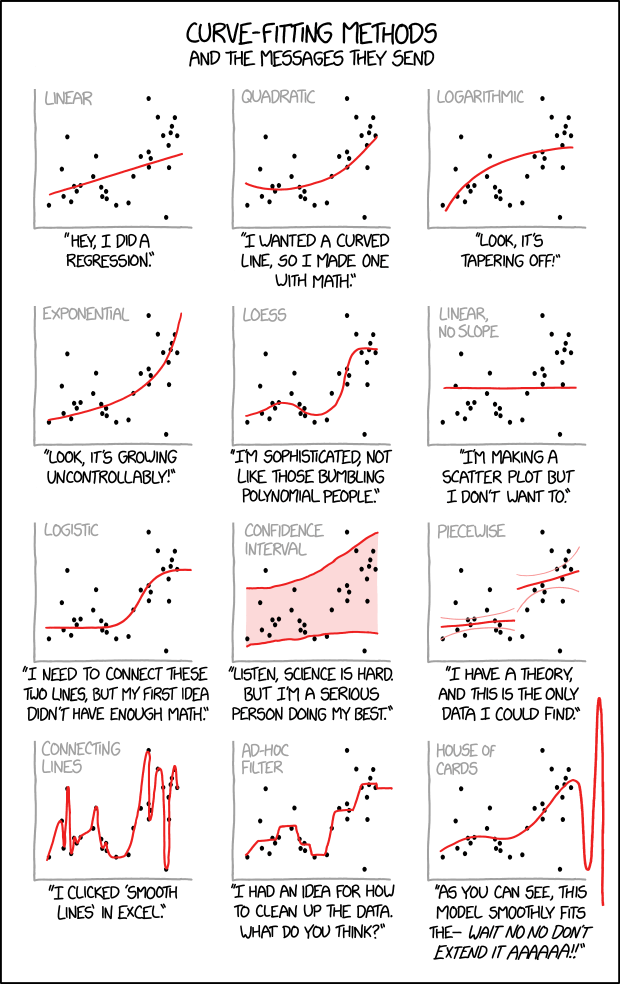

<center> Relevant XKCD </center>


<h3>Naive Forecasting Method<h3> 
<font color='lightseagreen'>
<p>Befoere beginning any kind of Neural Network, we should attempt a naive forecasting method, noticeably this is predicting price of USDJPY pair, we will attempt to use Time Series Forecasting Analysis Methods</p>
<p>Enter ARIMA. In this model, we will only need one feature: the Target itself. aka Closing price. We will investigate whether Closing price itself is enough to determine its future price.</p>
    </font>

<h5>What is ARIMA?<h5> 
<font color='lightseagreen'>
<p>In time series analysis, a model often used is known as Auto Regressive Integrated Moving Average (ARIMA)</p>
<p>An ARIMA model is one where the time series was differenced at least once to make it stationary and you combine the AR and the MA terms. So the combined equation is as follows:</p>
<p>Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)</p>


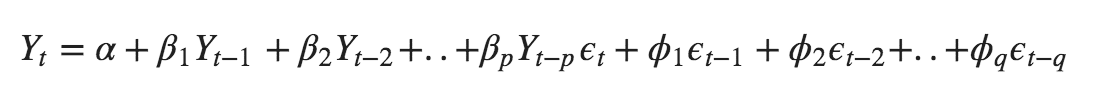
<center> ARIMA Equation </center>

In [15]:
# Task 4 Occams Razer 
price = result['Close']
price = pd.DataFrame(price)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B48AF41400>]],
      dtype=object)

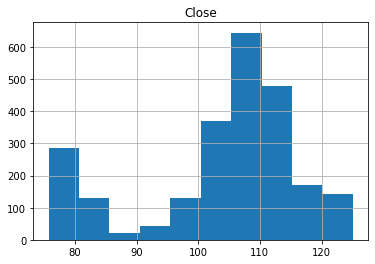

In [16]:
price.hist()

In [17]:
import pmdarima as pm
model = pm.auto_arima(price, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4448.029, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4444.724, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4446.131, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4446.120, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4443.703, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.194 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2418
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2220.852
Date:                Sat, 16 Oct 2021   AIC                           4443.703
Time:                        21:59:13   BIC                           4449.493
Sample:                             0   HQIC                          4445.809
                               - 2418                                       

<h5>Auto ARIMA<h5> 
<font color='lightseagreen'>
<p>auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC. This is a form of gridsearch which the hypermodel is itself optimizing the best set of parameters for the Model. </p>
<h5>Akaike’s Information Criterion (AIC)<h5>
<font color='lightseagreen'>
<p>Good models are obtained by minimising the AIC, AICc or BIC.
It is important to note that these information criteria tend not to be good guides to selecting the appropriate order of differencing ( d) of a model, but only for selecting the values of  p and q.This is because the differencing changes the data on which the likelihood is computed, making the AIC values between models with different orders of differencing not comparable.</p>
<h5>Augmented Dickey Fuller test(ADF)<h5>
<font color='lightseagreen'>
<p>Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series. In other words, through ADF, we aim to investigate whether the series is time dependent.</p>

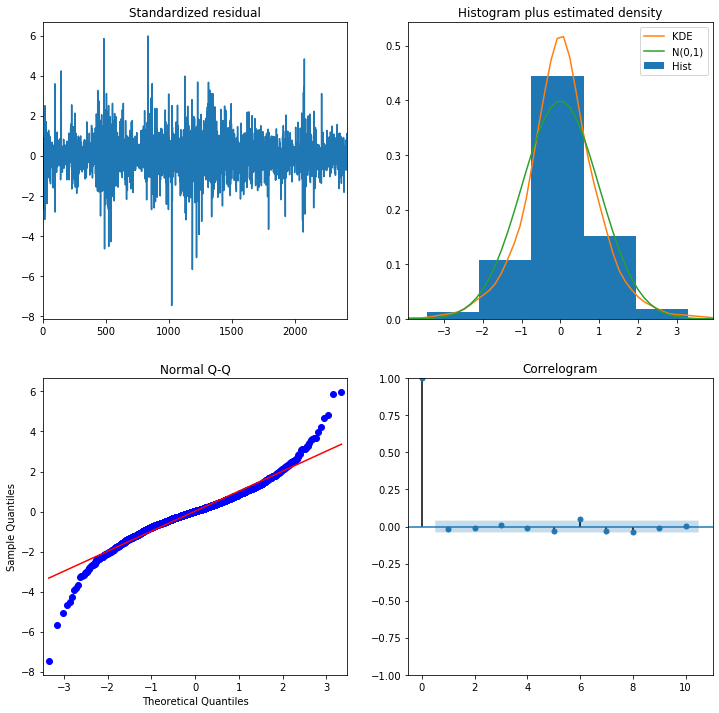

In [18]:
model.plot_diagnostics(figsize=(12,12))
plt.show()

<h5>Model Summary<h5> 
<font color='lightseagreen'>
<p>Top left: The residual errors seem to fluctuate around a mean of zero and have a non- uniform variance.</p>
<p>Top Right: The density plot suggest normal distribution with mean zero.</p>

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed. This implies that our JPY = X closing price has a skewed distribution

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So we will need to look for more X’s (predictors) to the model.

In [19]:
# Forecast
n_periods = 7
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(price), len(price)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)



price.reset_index(inplace=True)

<h5>Code Snippet 9<h5> 
<font color='lightseagreen'>
<p>Here we have already fitted thee model previously and now predicting for the next 7 periods.  </p>


In [20]:
futurejpy = pdr.DataReader('USDJPY%3DX', data_source='yahoo', start='2021-09-01', end='2021-10-14')
next5days = futurejpy.loc['2021-09-30':'2021-10-10']
next5daysprice = next5days['Close']
next5daysprice = pd.DataFrame(next5daysprice)

actualfuture= next5daysprice.copy(deep = True)

idx = [2418,2419,2420,2421,2422,2423,2424]
actualfuture['Index'] = idx
actualfuture.reset_index(inplace=True)
actualfuture = actualfuture.set_index('Index')

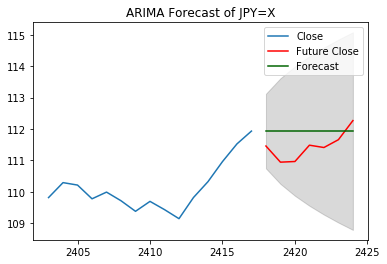

<Figure size 864x864 with 0 Axes>

In [21]:
rows = price.iloc[-15:]
plt.plot(rows['Close'])
plt.plot(actualfuture['Close'], color ='red')
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("ARIMA Forecast of JPY=X")
plt.legend(['Close','Future Close','Forecast'])
plt.figure(figsize=(12,12))
plt.show() 

<h5>Code Snippet 10<h5> 
<font color='lightseagreen'>
<p>In [20] we start to pull data from 30th sept 2021 to 14th oct 2021 and this will be our unseen data that we want our model to forecast. </p>
<p>Most importantly, we obtain the plot above for the past 1 month. Blue line indicates historical price from 14th sept up till 30th sept. This is where our model forecasts in the green line by predicting a straight line! The red line denotes the acutal closing price.</p>
<p><Strong> Analysis: While our model doesnt correctly predict the price itself, observe the grey bounds. They represeent thee lower and upper bound of the foreecasted range with a 95% confidence interval from 109 - 115. This seems to be an acceeptable p-value for us to acceept and works with the actual closing price itself. </Strong></p>


Reference Code:
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
https://towardsdatascience.com/forecasting-exchange-rates-using-arima-in-python-f032f313fc56

In [22]:
## Write to CSV
filepath = downloads_path = str(Path.home() / "Downloads"/"Task4.csv")
fc_series.to_csv(filepath)

### Task 5: Using Keras on TensorFlow build a Long Short Term Memory (LSTM) and forecast "JPY=X" 5 days in advance (+1, +2, +3, +4, +5). 

(If you are able to build return LSTM, then you can skip this task)

Last, export the 5days forecast to .csv file. 

[If this is your first foray into machine learning, you can check out this introductory video here on genetic breeding models](https://www.youtube.com/watch?v=R9OHn5ZF4Uo)


[Follow up video on Neural Networks](https://www.youtube.com/watch?v=wvWpdrfoEv0)

<h5>What is LSTM?<h5> 
<font color='lightseagreen'>
<p>"Long short-term memory (LSTM) was proposed by Hochreiter and Schmidhuber (1997). LSTM is a recurrent neural network architecture that was designed to overcome the vanishing gradient problem found in conventional recurrent neural networks (RNNs) (Biehl 2005). Errors between layers tend to vanish or blow up, which causes oscillating weights or unacceptably long convergence times. The initial LSTM structure solves this problem by introducing the constant error carousel (CEC). In this way, the architecture ensures constant error flow between the self-connected units (Hochreiter and Schmidhuber 1997).

The memory cell of the initial LSTM structure consists of an input gate and an output gate. While the input gate decides which information should be kept or updated in the memory cell, the output gate controls which information should be output. This standard LSTM was extended with the introduction of a new feature called the forget gate (Gers et al. 2000). The forget gate is responsible for resetting a memory state that contains outdated information. Furthermore, peephole connections and full back-propagation through time (BPTT) training are final features that were added to the LSTM architecture (Gers and Schmidhuber 2000; Greff et al. 2017). With these modifications, the architecture was renamed Vanilla LSTM (Greff et al. 2017), as shown in Fig. 1."</p>


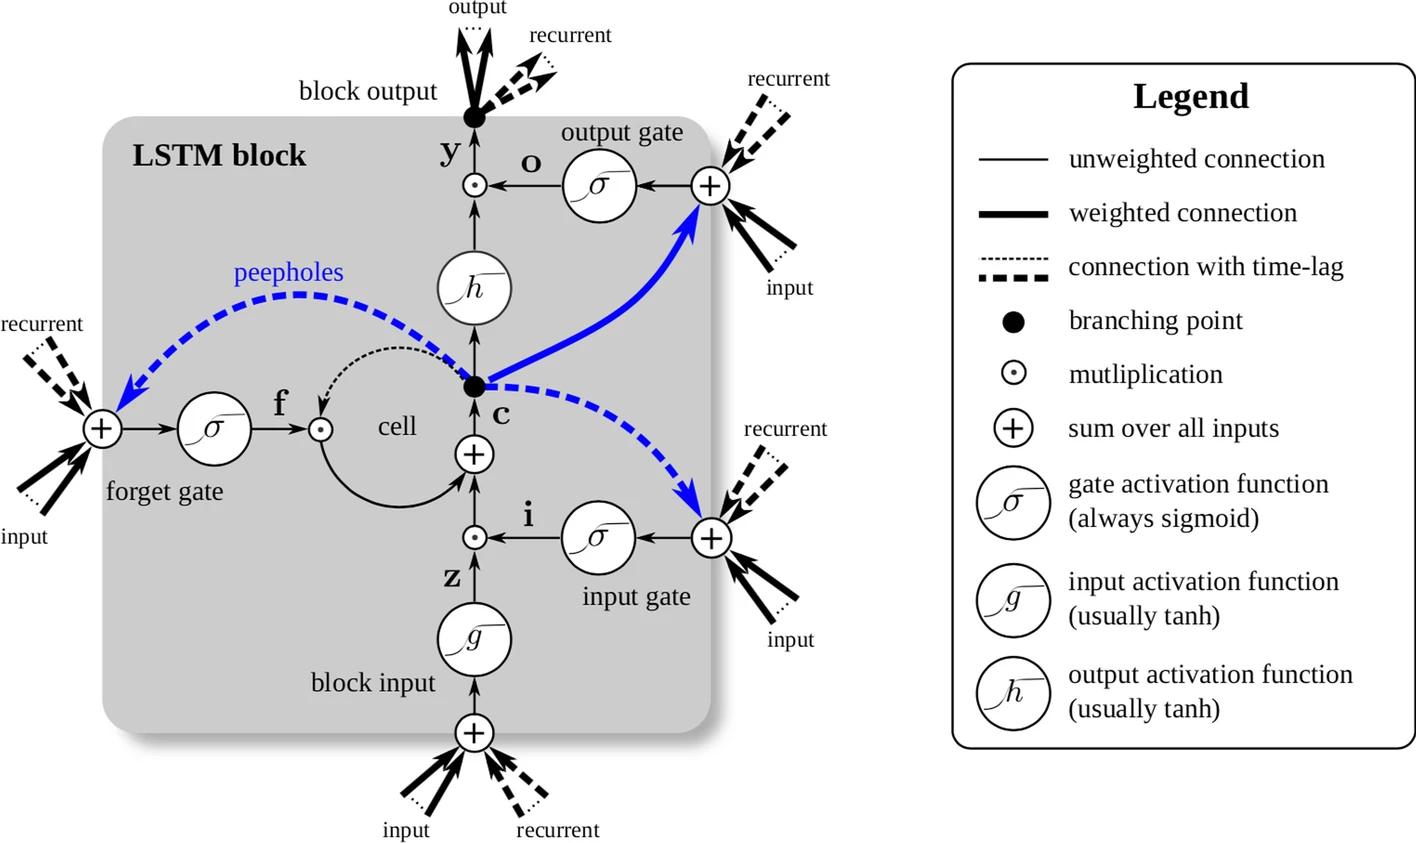

<center>Image of LSTM Node</center>

<h5> TLDR <h5>
<font color='lightseagreen'>
<p>LSTM is a specific neural network architecture which features an optimizeed forward and back propagation that is a problem in RNN. The way it introduces this is in several drop out layers known as forget gates and block input. </p>
    
<p>The following code cells build an LSTM network with 4 hidden layers and will utilize the PCA reduced dataset in the earlier section to optimize search space. </p>

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

physical_devices = tf.config.experimental.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

Using TensorFlow backend.


In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [25]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'sgd', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1934/1934 [==============================] - 4s 2ms/step - loss: 710.5882
Epoch 2/100
1934/1934 [==============================] - 2s 923us/step - loss: 208.0457 
Epoch 3/100
1934/1934 [==============================] - 2s 882us/step - loss: 189.1761
Epoch 4/100
1934/1934 [==============================] - 2s 987us/step - loss: 93.4758
Epoch 5/100
1934/1934 [==============================] - 2s 878us/step - loss: 102.3071
Epoch 6/100
1934/1934 [==============================] - 2s 854us/step - loss: 77.2687
Epoch 7/100
1934/1934 [==============================] - 2s 881us/step - loss: 71.3455
Epoch 8/100
1934/1934 [==============================] - 2s 882us/step - loss: 71.7511
Epoch 9/100
1934/1934 [==============================] - 2s 893us/step - loss: 67.7834
Epoch 10/100
1934/1934 [==============================] - 2s 874us/step - loss: 68.5978
Epoch 11/100
1934/1934 [==============================] - 2s 984us/step - loss: 65.9602
Epoch 12/100
1934/1934 [==============

Epoch 94/100
1934/1934 [==============================] - 2s 811us/step - loss: 19.4404
Epoch 95/100
1934/1934 [==============================] - 2s 801us/step - loss: 19.8507
Epoch 96/100
1934/1934 [==============================] - 2s 799us/step - loss: 20.2931
Epoch 97/100
1934/1934 [==============================] - 2s 814us/step - loss: 17.6701
Epoch 98/100
1934/1934 [==============================] - 2s 783us/step - loss: 18.7629
Epoch 99/100
1934/1934 [==============================] - 2s 873us/step - loss: 17.9205
Epoch 100/100
1934/1934 [==============================] - 2s 803us/step - loss: 18.1745



<font color='lightseagreen'>

<p>Note: The model trains each epoch in under 2 seconds becausee thee dataset has been reduced in dimension to 4 Principal Components, otherwise with over 30 features, there is no telling how long the model should be trained for. The loss metric converges to about 20 </p>

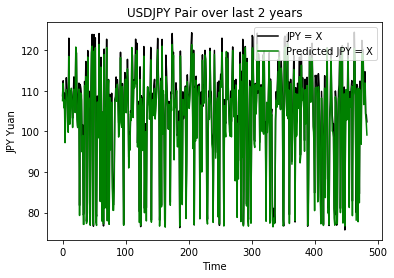

In [26]:

predicted_stock_price = regressor.predict(X_test)

plt.plot(y_test, color = 'black', label = 'JPY = X')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted JPY = X')
plt.title('USDJPY Pair over last 2 years')
plt.xlabel('Time')
plt.ylabel('JPY Yuan')
plt.legend()
plt.show()

<h5> Code Snippet 11 <h5>
<font color='lightseagreen'>
<p>Here we see the target variable in black followed by the model training set in green. Good or bad is too early to tell! Initially we can be quite happy the model does well on training set data, accounting for a large amount of variance. Perhaps thee peaks it does not cover is due to some missing features like LIBOR or Fed Exchange rate for instance. But good enough, the results are quite satisifying. However, before we get too happy - this could be a classic case of overfitting!</p>

In [27]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4, 50)             10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 4, 50)             20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 50)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [28]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,predicted_stock_price))

4.616638338232263


<h5> Model Summary <h5>
<font color='lightseagreen'>
<p>Showing the Model Architecture, because we only have 4 initial vectors (neurons), the model does not see fit to drop out any conneections. MSE Error of 2.3 is around the standard benchmark for most neural networks as well</p>

In [29]:
futureeur = pdr.DataReader('USDEUR%3DX', data_source='yahoo', start='2021-09-01', end='2021-10-14')
futureeur['Ticker'] = "USDEUR"

futuregbp = pdr.DataReader('USDGBP%3DX', data_source='yahoo', start='2021-09-01', end='2021-10-14')
futuregbp['Ticker'] = "USDGBP"

futurechf = pdr.DataReader('USDCHF%3DX', data_source='yahoo', start='2021-09-01', end='2021-10-14')
futurechf['Ticker'] = "USDCHF"

future_forex = futureeur.append([futuregbp,futurechf])
future_forex.fillna(0, inplace = True)

forex_pairs = future_forex[['Close', 'Ticker']]
forex_pairs.reset_index(level=0, inplace=True)
forex_pairs = forex_pairs.pivot(index = 'Date',columns = 'Ticker' ,values='Close')
forex_pairs= forex_pairs.fillna(method = 'ffill')
forex_pairs= forex_pairs.fillna(0)



In [30]:
tickers = ['HYG', 'JNK', 'LQD', 'VCIT', 'SPY', 'TMUS', 'CCO', 'THC', 'USD', 'CME',  'EMB', 'AGZ', 'IEI', '^N225', 'VTI', 'VOO', 'QQQ']

lst = [] 
for ticker in tickers:
    temp_df = pdr.DataReader(ticker, data_source='yahoo', start='2021-09-01', end='2021-10-14')
    temp_df['Ticker'] = ticker 
    lst.append(temp_df)

empty_df = pd.DataFrame()
df_ticker = empty_df.append(lst)
df_ticker.fillna(0,inplace = True)
df_ticker.head()
    
index_closing = df_ticker[['Close', 'Ticker']]
index_closing.reset_index(level=0, inplace=True)
index_closing = index_closing.pivot(index = 'Date',columns = 'Ticker' ,values='Close')
index_closing = index_closing.fillna(method = 'ffill')
index_closing = index_closing.fillna(0)


In [31]:
futurejpy = pdr.DataReader('USDJPY%3DX', data_source='yahoo', start='2021-09-01', end='2021-10-14')

futurejpy['Moving Average'] = ta.SMA(futurejpy['Close'],20) ## Adding Feature #1 - Simple Moving Average 
futurejpy['ADX'] = ta.ADX(futurejpy['High'],futurejpy['Low'], futurejpy['Close'], timeperiod=20) ##Adding Feature #2 - Average Directional Movement Index (ADX)
futurejpy['RSI'] = ta.RSI(futurejpy['Close'],14) ## Adding Feature #4 - Relative Strength Index RSI
futurejpy['up_band'], futurejpy['mid_band'], futurejpy['low_band'] = ta.BBANDS(futurejpy['Close'], timeperiod =20) ## Adding Features #5-7 Bollinger Bands
futurejpy['ROC'] = ta.ROC(futurejpy['Close'],12) ## Adding Feature #8 Rate of Change ROC
futurejpy['CCI'] = ta.CCI(futurejpy['High'], futurejpy['Low'],futurejpy['Close'],20)
futurejpy = futurejpy.fillna(method = 'bfill')
futurejpy = futurejpy.fillna(0)


In [32]:
futurecombine = pd.concat([futurejpy,index_closing,forex_pairs], axis=1, join="inner")
futurecombine = futurecombine.fillna(method = 'ffill')
futurecombine = futurecombine.dropna()


In [33]:
next5days = futurecombine.loc['2021-09-30':'2021-10-10']
next5daysprice = next5days['Close']
next5daysprice = pd.DataFrame(next5daysprice)


<h5> Code Snippet 12 <h5>
<font color='lightseagreen'>
<p>In the above cells we are now preparing the final dataset to feed our LSTM network with data it has not seen to see how accurately it can forecast. What we are doing above - Download tickers and forex and ta data from 1st sept to 14th oct to prepare our pre-PCA dataset for this period. Then, compress it down to 4 components using PCA, and then feed in to our LSTM</p>

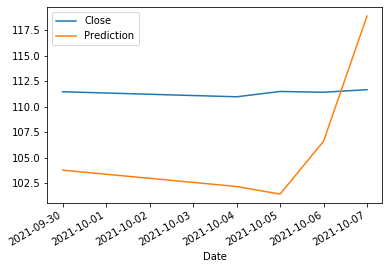

In [34]:
features = ['High','Low','Open','Moving Average', 'ADX', 'RSI', 'up_band', 'mid_band', 'low_band', 'ROC', 'CCI','HYG', 'JNK', 'LQD', 'VCIT', 'SPY', 'TMUS', 'CCO', 'THC', 'USD', 'CME', 'EMB', 'AGZ',  'IEI', '^N225', 'VTI', 'VOO', 'QQQ','USDCHF','USDEUR','USDGBP'] 

# Separating out the features
x = next5days.loc[:, features].values
# Separating out the target
y = next5days.loc[:,['Close']].values
# Standardizing the features
x = StandardScaler().fit_transform(x) 
x  = pca.transform(x)

Unseen_test = np.reshape(x, (x.shape[0], x.shape[1], 1))
unseen_stock_price = regressor.predict(Unseen_test)
unseen_stock_price = pd.DataFrame(unseen_stock_price, index = next5daysprice.index,columns = ['Prediction'])
lstmprediction = pd.concat([next5daysprice,unseen_stock_price],axis=1, join="inner")
lstmprediction.plot()

In [35]:
filepath = downloads_path = str(Path.home() / "Downloads"/"Task5.csv")
lstmprediction.to_csv(filepath)

<h5> Analysis <h5>
<font color='lightseagreen'>
<p>Seems like our model has beeen overfitted as it deviates quite strongly from the actual closing price, however, our neural network seems to account for <strong> direction </strong> of the movement of prices relatively well! Interesting to note that perhaps more data could account for overcorrection of our model as well.

Reference Code: 
https://jfin-swufe.springeropen.com/articles/10.1186/s40854-020-00220-2/figures/1
https://jfin-swufe.springeropen.com/articles/10.1186/s40854-020-00220-2#Sec7
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
https://www.datacamp.com/community/tutorials/lstm-python-stock-market
https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html

<h1> Conclusion <h1>

<h4>Summary<h4>
    <font color='lightseagreen'>
<p>1. In the first task we downloaded forex and indices data and shaped it in a long table format. We have in our Downloads folder to combined Ticker and USD/X Pairs from Forex as a csv file</p>
    </font> <br>
    <font color='Coral'>
<p>2. We built extra features from the Technical Analysis Library and shaped our data using Closing price of various indices, in particular SPY and N225 and various Forex Pairs as well. We then built the pearson correlation matrix and visualized the plot. Findings: Open,Low,High,MA, N225,USDEUR were highly correlated with JPY = X. Does this mean all our correlated features are most important? </p>
    </font> <br>
    <font color='DarkCyan'>
<p>3. We used Principal Component Analysis to reduce dimension space on our dataset from 32 features to 4. Does this mean we can identify our most important features this way? Not quite. We used another technique in sklearn to select the features which account for the most variance within our dataset and printed it to console. These features were not neccesarily the most correlated as found in part 2.</p>
   </font> <br>
   <font color='PaleVioletRed'>
<p>4. As our naive time series forecasting model, we used ARIMA and auto ARIMA to optimize d p and q parameters during our grid search. We can conclude from our observations of forecasted price and ADF metric that our series is likely non-stationary and likely to be time dependent. Our results were significant eneough to give us within 95% conf interval a lower and upper bound of closing prices, which seems to hold up well against actual values.</p>
   <font color='PeachPuff'> <br>
<p>5. Lastly, we built a LSTM neural network using the previous dataset in [3] which we have reduced to just 4 features to optimize search space. During our model fitting/training phase, the model shows good results in learning the training set because we observed that most of the variance was accounted for in the black and green graph, and MSE on validation/test set shows a rather good fit as well. We then performed ETL on 30th sept onwards unseen data and plugged it back into our NN for prediction. What we observed was even though there was significant deviation from actual prices, the model accounts for direction of price movement rather well.</p>
    </font>


<h4>Remarks<h4>
    <font color='lightseagreen'>
        <p> All in all, both models should be used together to conduct multivariate analysis on timeseries forecasting on USDJPY pair. ARIMA accounts for high and low bounds and LSTM accounts for direction of price movement. <br> </p>
        <p> Both these models work in theory however in practice, the practicality of LSTM is questioned because it is trained on Open, Low and High prices of the trading day. <br> </p>
       <p> Unless there was a way to accurately predict these factors, the LSTM is somewhat limited in capacity. In fact if there was indeed a way to forecast just the Opening price without using these factors, the LSTM might not even be needed. <br></p>
        That being said, more research and study could be conducted on other fundamental features (LIBOR) for eg. that could be interesting to see. I will also be heavily interested in other asset classes (BTC, GME) as well! 
        
        